## Exploratory Analysis Script
###### Applying Visualization Techniques to the dataset

#### Importing Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_selection import f_classif

#### Change Directory to Dataset Directory

In [20]:
cd "d:/Semester 6/FIT3162/Fakeddit"

d:\Semester 6\FIT3162\Fakeddit


In [21]:
df = pd.read_csv('dataset.csv', index_col = 0)

In [22]:
len(df)

10000

In [23]:
df.head(2)

,clean_title,created_utc,domain,id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,comment_sentiment,post_sentiment,domain_rank
0,can i still cash in my brain needs to rest,2017-06-17 12:58:22,self.SubredditSimulator,6hrnqx,20,17,subredditsimulator,Can I still cash in my brain needs to rest,0.9,0,-0.034000,0.0,1000001
1,how did the wheat say to its son photoshop,2019-07-27 18:58:22,self.SubredditSimulator,cig6ey,20,3,subredditsimulator,How did the wheat say to its son Photoshop?,1.0,0,0.196715,0.0,1000001


##### Hypothesis Testing for comment sentiment and post sentiment

In [24]:
X = np.array(df[['comment_sentiment','post_sentiment', 'domain_rank', 'upvote_ratio']])

In [25]:
y = np.array(df['2_way_label'])

In [26]:
# ANOVA F-value
f_score, f_p_value = f_classif(X,y)
print('F - score score   ', f_score)
print('F - score p-value ', f_p_value)

F - score score    [1755.01556424  242.78262571 3583.22253538   98.56722516]
F - score p-value  [0.00000000e+00 4.19858842e-54 0.00000000e+00 4.01893477e-23]


##### Comment Sentiment Boxplot

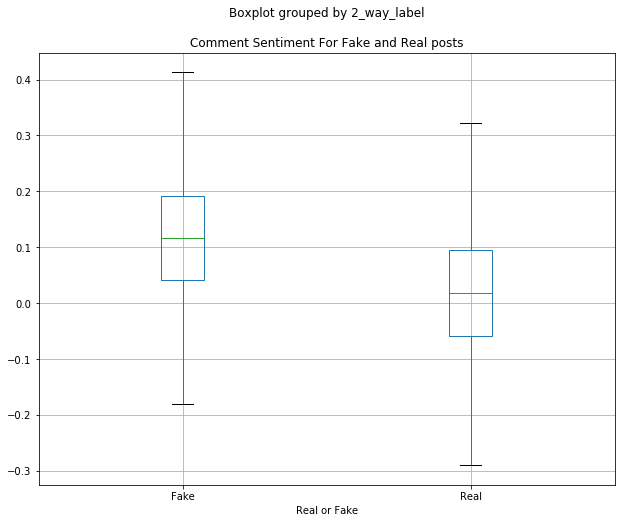

In [27]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
df.boxplot(column=['comment_sentiment'], by='2_way_label', showfliers=False, ax=ax)
plt.title('Comment Sentiment For Fake and Real posts')
plt.xlabel('Real or Fake')
plt.xticks([1, 2], ['Fake', 'Real'])
plt.show()

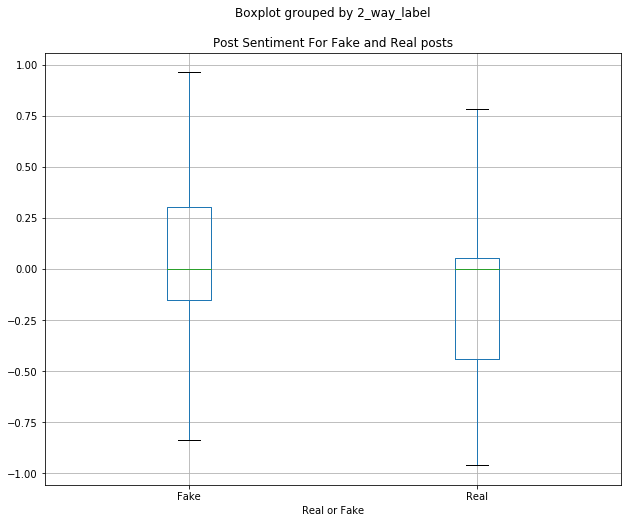

In [28]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
df.boxplot(column=['post_sentiment'], by='2_way_label', showfliers=False, ax=ax)
plt.title('Post Sentiment For Fake and Real posts')
plt.xlabel('Real or Fake')
plt.xticks([1, 2], ['Fake', 'Real'])
plt.show()

##### Domain Rank Mean BoxPlot

In [29]:
float_array = df['domain_rank'].values.astype(float)

In [30]:
# create a min max processing object
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array.reshape(-1, 1))

In [31]:
df['domain_rank'] = scaled_array

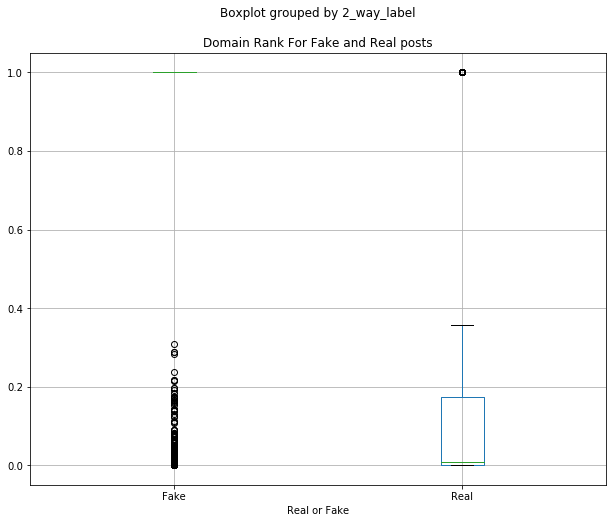

In [32]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
df.boxplot(column=['domain_rank'], by='2_way_label', showfliers=True, ax=ax)
plt.title('Domain Rank For Fake and Real posts')
plt.xlabel('Real or Fake')
plt.xticks([1, 2], ['Fake', 'Real'])
plt.show()

##### Up-vote to Downvote ratio boxplot

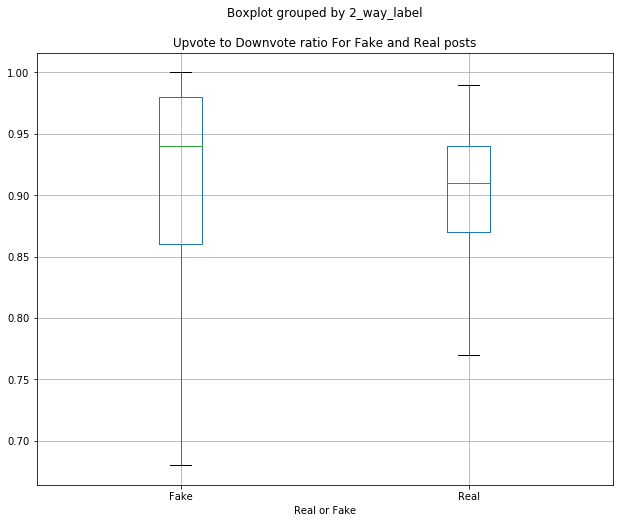

In [33]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
df.boxplot(column=['upvote_ratio'], by='2_way_label', showfliers=False, ax=ax)
plt.title('Upvote to Downvote ratio For Fake and Real posts')
plt.xlabel('Real or Fake')
plt.xticks([1, 2], ['Fake', 'Real'])
fig.savefig('image.png')
plt.show()